## Time Series Analysis in Python 

### Sumary

In this module, we will use a company's historical sales dataset during 2023 to predict total sales in January 2024 using time series through Exponential Smoothing analysis.

Exponential smoothing is a time series analysis and forecasting technique that applies weighted averages to historical data, with weights decreasing exponentially as the data gets older. Exponential smoothing is useful for addressing trends and seasonality in data, and for reducing noise.

In [1]:
#Python Version
from platform import python_version
print(python_version())

3.9.13


In [2]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

### Load the dataset

In [3]:
#Load dataset
dt = pd.read_csv('dataset.csv')

In [4]:
dt.shape

(365, 2)

In [5]:
dt.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [6]:
dt.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [7]:
#Rename Columns
dt.rename(columns ={'Total_Vendas' : 'Sales_Total'}, inplace = True)

In [8]:
dt.head()

,Data,Sales_Total
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


## Pre-Processing of Data

In [9]:
# Minimum value of data column
dt['Data'].min()

'2023-01-01'

In [10]:
# Maximum value of data column
dt['Data'].max()

'2023-12-31'

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data         365 non-null    object 
 1   Sales_Total  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [12]:
# Convert data column no type datetime
dt['Data'] = pd.to_datetime(dt['Data'])

In [13]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         365 non-null    datetime64[ns]
 1   Sales_Total  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [14]:
# Convert Dataframe to Time Series with Date as Index
time_serie = dt.set_index('Data')['Sales_Total']

In [15]:
type(time_serie)

pandas.core.series.Series

In [16]:
time_serie

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Sales_Total, Length: 365, dtype: float64

In [17]:
# Provides the frequency of the time series (daily in this case)
time_serie = time_serie.asfreq('D')

In [18]:
time_serie

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Sales_Total, Length: 365, dtype: float64

## Exploratory Analysis 

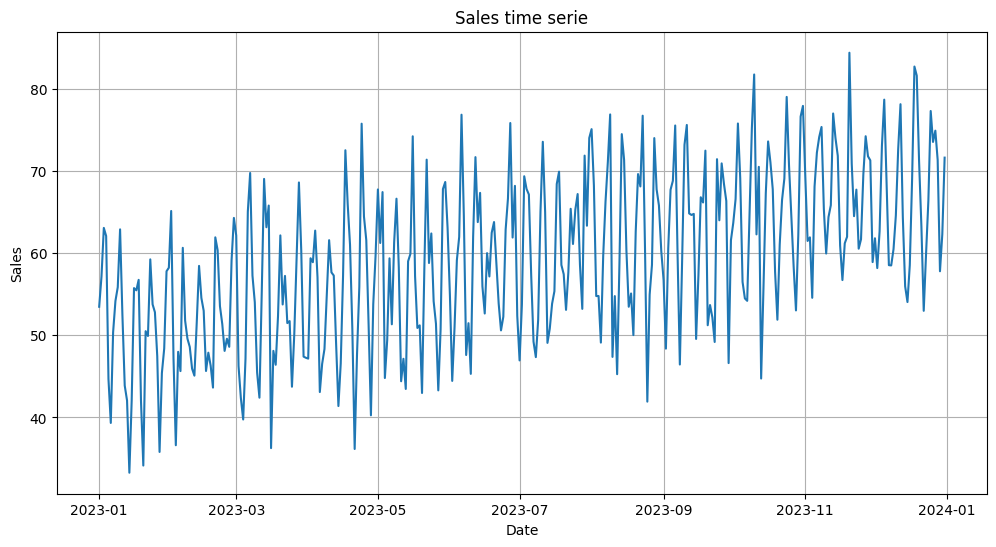

In [19]:
#Create the time serie graph(unformatted)
plt.figure(figsize = (12,6))
plt.plot(time_serie)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales time serie')
plt.grid(True)
plt.show()

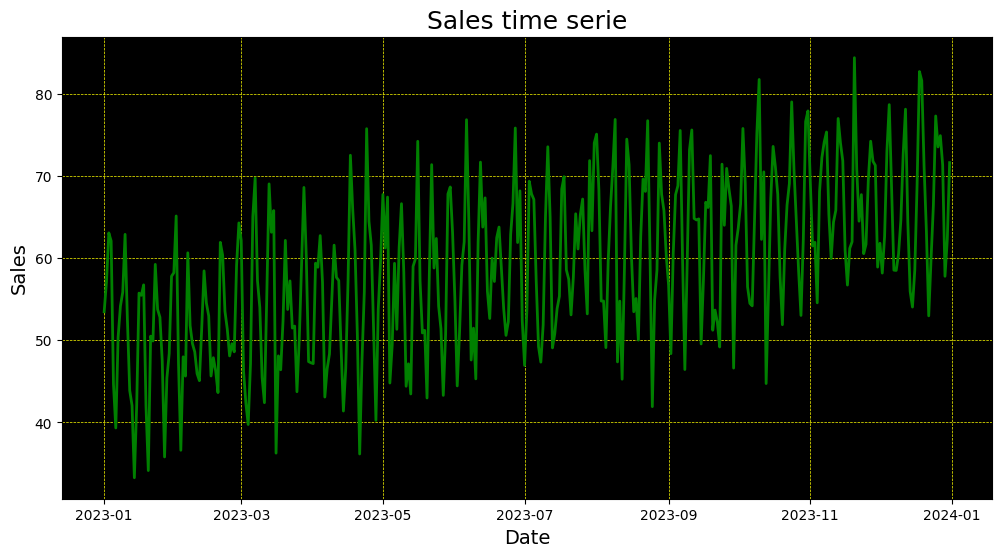

In [20]:
#Create the time serie graph(formatted)


#Create the time serie graph with contrast layout
plt.figure(figsize = (12,6))
plt.plot(time_serie, color = 'green', linewidth = 2)

#Set chart color and style
plt.gca().set_facecolor('black')
plt.grid(color = 'yellow', linestyle = '--', linewidth = 0.5)

#Configure axis labels, title and legend
plt.xlabel('Date', color = 'black', fontsize = 14)
plt.ylabel('Sales', color = 'black', fontsize = 14)
plt.title('Sales time serie', color = 'black', fontsize = 18)

# Configure the colors of the axes and ticks (markers)
plt.tick_params(axis = 'x', colors = 'black')
plt.tick_params(axis = 'y', colors = 'black')

plt.show()

### Exponential smoothing

In [21]:
#Create the model
model = SimpleExpSmoothing(time_serie)

In [22]:
#Training(adjust) the model
adjusted_model = model.fit(smoothing_level = 0.2)

In [23]:
#Extract the values predicted by the model
Exponential_smoothing = adjusted_model.fittedvalues

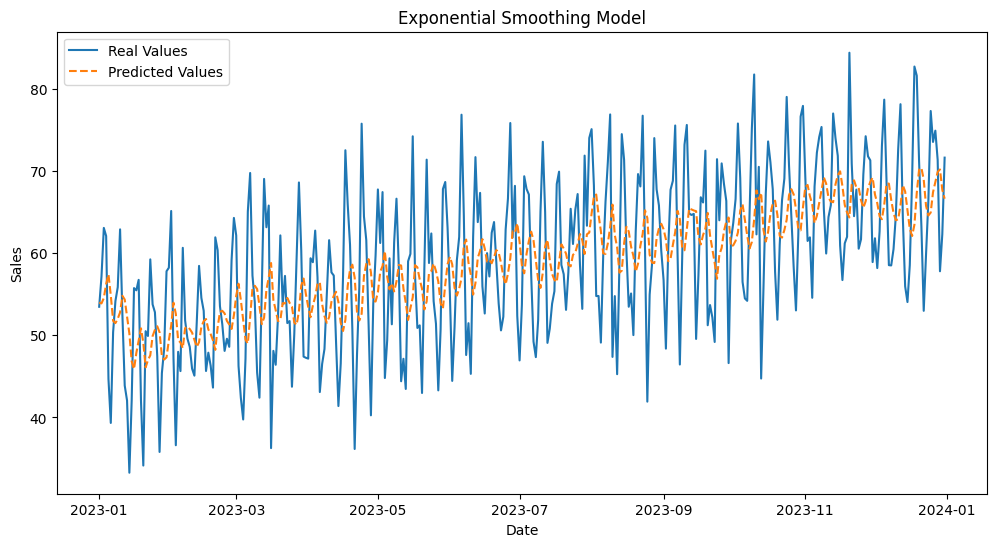

In [24]:
#plot
plt.figure(figsize = (12,6))
plt.plot(time_serie, label = 'Real Values')
plt.plot(Exponential_smoothing, label = 'Predicted Values', linestyle = '--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Exponential Smoothing Model')
plt.legend()
plt.show()

## Deploy and Predict with the Trained Model 

In [25]:
#Making predictions
num_predictions = 1
prediction = adjusted_model.forecast(steps = num_predictions)

In [26]:
print('Total Sales Forecast for January 2024: ', round(prediction[0], 4))

Total Sales Forecast for January 2024:  67.6499
